In [ ]:
 import warnings
 warnings.filterwarnings("ignore")

 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
df = pd.read_csv('tvmarketing.csv')

In [ ]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [ ]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

TV       0.0
Sales    0.0
dtype: float64

<Axes: ylabel='TV'>

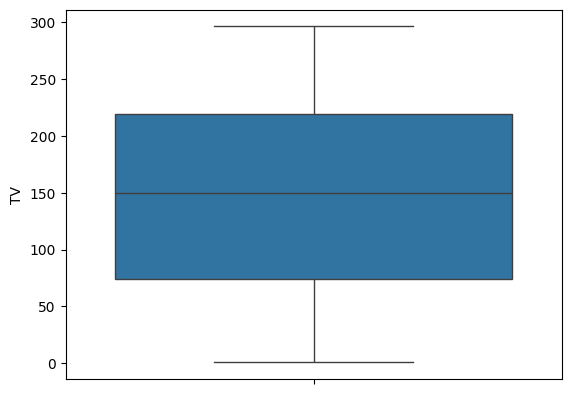

In [ ]:
sns.boxplot(df.TV)

<Axes: ylabel='Sales'>

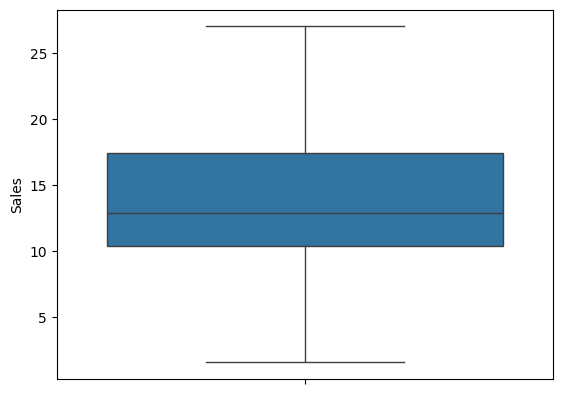

In [ ]:
sns.boxplot(df.Sales)

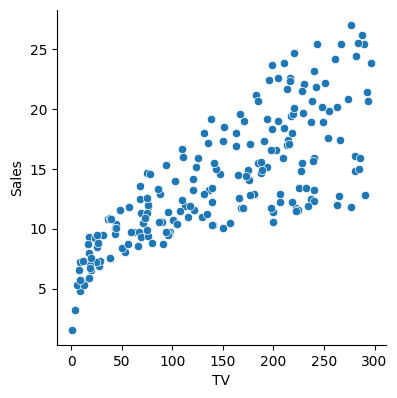

In [ ]:
sns.pairplot(df, x_vars=['TV'], y_vars=['Sales'], height=4, aspect= 1, kind='scatter')
plt.show()

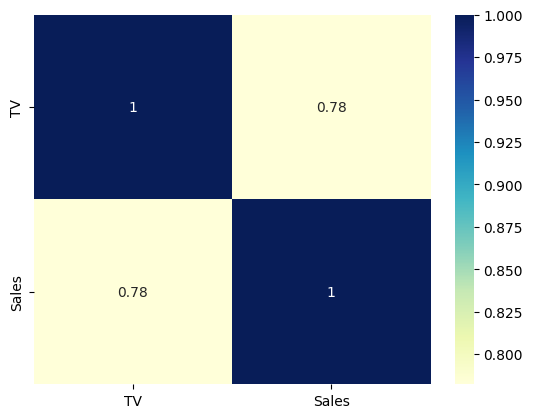

In [ ]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
  x = df['TV']
  y = df['Sales']

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.8, test_size =0.2 ,random_state=100)

In [ ]:
x_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [ ]:
x_train.shape

(160,)

In [ ]:
x_test.shape

(40,)

In [ ]:
y_train.head()

168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
Name: Sales, dtype: float64

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test.shape

(40,)

In [ ]:
import statsmodels.api as sm
x_train_sm= sm.add_constant(x_train)
lr = sm.OLS(y_train,x_train_sm).fit()

In [ ]:
lr.params

const    7.113008
TV       0.046110
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     257.5
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           5.36e-35
Time:                        14:47:27   Log-Likelihood:                -417.09
No. Observations:                 160   AIC:                             838.2
Df Residuals:                     158   BIC:                             844.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1130      0.492     14.469      0.000       6.142       8.084
TV             0.0461      0.003     16.048      0.000       0.040       0.052
==============================================================================
Omnibus:                        0.306   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.467
Skew:                          -0.033   Prob(JB):                        0.792
Kurtosis:                       2.744   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must be the same size

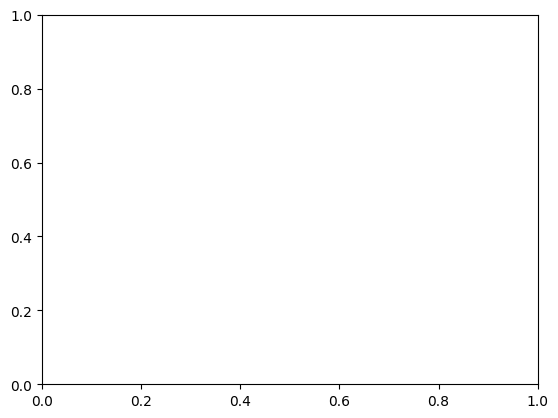

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,7.113 + 0.0461*x_train,'r')
plt.show()

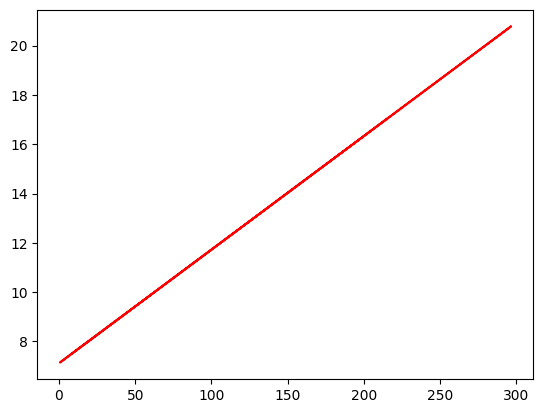

In [ ]:
plt.plot(x_train,7.113 + 0.0461*x_train,'r')
plt.show()

In [ ]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

In [ ]:
y_train

168    17.1
112    14.1
171    14.5
181    12.2
7      13.2
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 160, dtype: float64

In [ ]:
y_train_pred

168    17.045050
112    15.214492
171    14.698063
181    17.187990
7      12.655401
         ...    
87     12.217358
103    15.777031
67     13.536097
24      9.985646
8       7.509552
Length: 160, dtype: float64

In [ ]:
res

168    0.054950
112   -1.114492
171   -0.198063
181   -4.987990
7      0.544599
         ...   
87     3.782642
103   -1.077031
67    -0.136097
24    -0.285646
8     -2.709552
Length: 160, dtype: float64

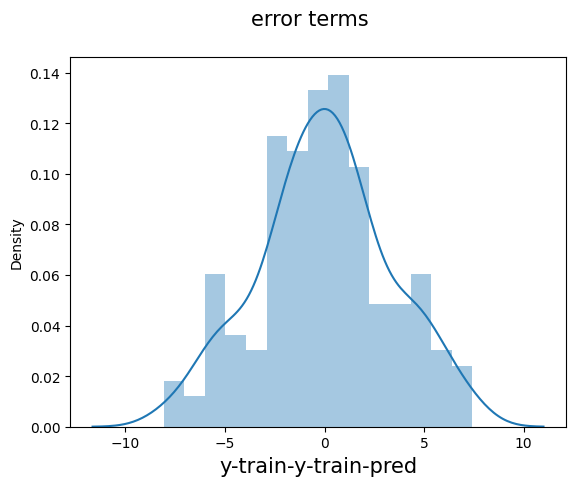

In [ ]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle("error terms", fontsize = 15)
plt.xlabel('y-train-y-train-pred',fontsize = 15)
plt.show()

ValueError: x and y must be the same size

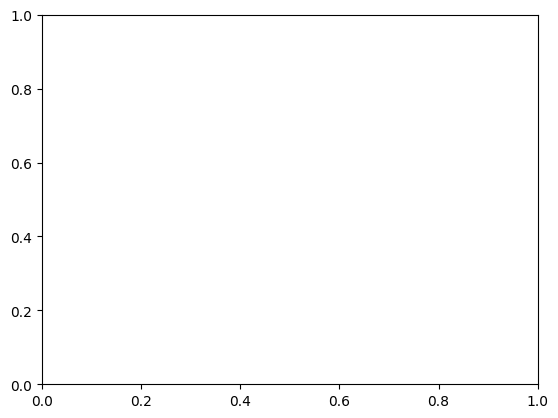

In [ ]:
plt.scatter(x_train,res)
pplt.show()

In [ ]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

In [ ]:
y_test_pred

126     7.472664
104    18.096352
99     13.347047
92     17.151102
111    18.257736
167    16.648506
116    13.531486
96     16.224296
52     17.091160
69     17.109603
164    12.517072
124    17.695197
182     9.704377
154    15.772420
125    11.133779
196    11.456547
194    14.015639
177    14.960889
163    14.651953
31     12.318800
11     17.012773
73     13.079611
15     16.122855
41     15.274435
97     15.638702
128    17.270988
133    17.247933
82     10.585073
139    15.638702
123    12.789119
83     10.266916
65     10.294581
151    12.692289
162    15.800086
170     9.418496
77     12.669234
32     11.594877
173    14.877891
174    17.367818
85     16.021413
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.5441581483697224

In [ ]:
mean_squared_error(y_test,y_test_pred)

9.687069547890875

In [ ]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

3.11240574923818